In [23]:
import pandas as pd
import seaborn as sns 

In [9]:
tx_data = pd.read_excel("QVI_transaction_data.xlsx")
purchase_behaviour = pd.read_csv("QVI_purchase_behaviour.csv")

High level overview of transaction data

In [12]:
# Data dimensions
tx_data.shape

(264836, 8)

In [13]:
# Data stats
tx_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Observation: The mean of total sales is 7.3, while the maximum value is 650. Therefore there are outliers present in the data.

In [10]:
# Data types
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


Observation: Apart from PROD_NAME, the rest are numeric data.

In [11]:
# looking at the null / missing values
tx_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Observation: There are are no null values present

In [21]:
# get rid of non-numeric data (object types)
numeric_tx_data = tx_data.select_dtypes(['float64', 'int64'])

C:\Users\mujib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_SALES'>

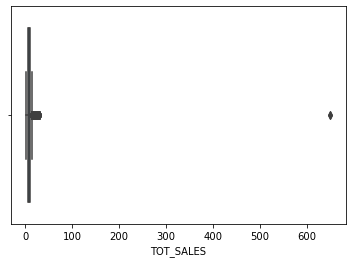

In [29]:
# looking for outliers
sns.boxplot(numeric_tx_data['TOT_SALES'])

We can see spot outliers near 600 and some values are a lot higher than the mean of 7.3 as well

In [34]:
# define outliers as: 2std +- mean and get rid of such outliers
mean = 7.304200
std = 3.083226
lower_outlier = mean - (2 * std)
upper_outlier = mean + (2 * std)
temp = numeric_tx_data[numeric_tx_data['TOT_SALES'] > lower_outlier]
clean_tx_data = temp[numeric_tx_data['TOT_SALES'] < upper_outlier]
clean_tx_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264124.000000,264124.000000,2.641240e+05,2.641240e+05,264124.000000,264124.000000,264124.000000
mean,43464.051071,135.072277,1.355424e+05,1.351508e+05,56.591355,1.899199,7.268766
std,105.293060,76.785574,8.059134e+04,7.813468e+04,32.822100,0.316993,2.452078
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.001900e+04,6.759250e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303540e+05,1.351255e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030930e+05,2.026942e+05,85.000000,2.000000,8.800000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,13.200000


C:\Users\mujib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_SALES'>

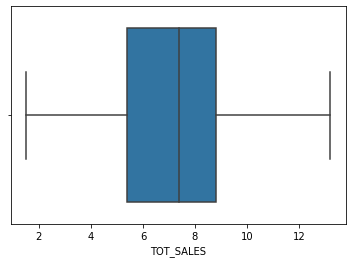

In [35]:
sns.boxplot(clean_tx_data['TOT_SALES'])

High level overview of purchase behaviour data 

In [37]:
# data dimensions
purchase_behaviour.shape

(72637, 3)

In [38]:
# Data stats
purchase_behaviour.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


Only numeric data is card number, therefore there are no statistical analysis required